In [57]:
import pandas as pd
import seaborn as sb

datos = pd.read_csv('U4_01_housing.csv')

In [58]:
datos_na = datos.dropna()

In [59]:
dummies = pd.get_dummies(datos_na['ocean_proximity'], dtype=int)

In [61]:
datos_na = datos_na.join(dummies)
datos_na = datos_na.join(datos_na['housing_median_age'].apply(lambda x: round(x, -1)).rename('edad_casa_redondeado'))
datos_na = datos_na.join(datos_na['median_house_value'].apply(lambda x: round(x, -4)).rename('valor_casa_redondeado'))
datos_na = datos_na.join(datos_na['longitude'].apply(lambda x: round(x, -1)).rename('longitud'))
datos_na = datos_na.join(datos_na['latitude'].apply(lambda x: round(x, -1)).rename('latitud'))
datos_na = datos_na.join(datos_na['median_income'].apply(lambda x: round(x, 0)).rename('ingreso_medio'))

datos_na = datos_na[datos_na['edad_casa_redondeado'] <= 30]

In [62]:
datos_na = datos_na.drop(['ocean_proximity'], axis=1)
datos_na = datos_na.drop(['housing_median_age'], axis=1)
datos_na = datos_na.drop(['median_house_value'], axis=1)

datos_na = datos_na.drop(['latitude'], axis=1)
datos_na = datos_na.drop(['longitude'], axis=1)
datos_na = datos_na.drop(['median_income'], axis=1)
datos_na = datos_na.drop(['households'], axis=1)

In [63]:
datos_na

,total_rooms,total_bedrooms,population,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,edad_casa_redondeado,valor_casa_redondeado,longitud,latitud,ingreso_medio
1,7099.0,1106.0,2401.0,0,0,0,1,0,20.0,360000.0,-120.0,40.0,8.0
50,896.0,453.0,735.0,0,0,0,1,0,20.0,170000.0,-120.0,40.0,1.0
59,158.0,43.0,94.0,0,0,0,1,0,0.0,60000.0,-120.0,40.0,3.0
70,768.0,152.0,392.0,0,0,0,1,0,30.0,80000.0,-120.0,40.0,2.0
74,835.0,161.0,290.0,0,0,0,1,0,20.0,140000.0,-120.0,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1665.0,374.0,845.0,0,1,0,0,0,20.0,80000.0,-120.0,40.0,2.0
20636,697.0,150.0,356.0,0,1,0,0,0,20.0,80000.0,-120.0,40.0,3.0
20637,2254.0,485.0,1007.0,0,1,0,0,0,20.0,90000.0,-120.0,40.0,2.0
20638,1860.0,409.0,741.0,0,1,0,0,0,20.0,80000.0,-120.0,40.0,2.0


In [64]:
datos_na['edad_casa_redondeado'].max()

30.0

In [65]:
datos_na.corr()

,total_rooms,total_bedrooms,population,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,edad_casa_redondeado,valor_casa_redondeado,longitud,latitud,ingreso_medio
total_rooms,1.000000,0.932420,0.866621,0.023026,-0.020572,-0.009124,0.021645,-0.019606,-0.297714,0.152498,-0.020027,-0.067732,0.193331
total_bedrooms,0.932420,1.000000,0.879682,0.044990,-0.051659,-0.006334,0.019527,-0.005472,-0.255293,0.062350,-0.014071,-0.103871,-0.012863
population,0.866621,0.879682,1.000000,0.085324,-0.064525,-0.009831,-0.009911,-0.025129,-0.213953,0.012702,-0.027558,-0.118162,0.019838
<1H OCEAN,0.023026,0.044990,0.085324,1.000000,-0.680508,-0.010614,-0.223689,-0.330686,0.100246,0.352726,-0.039752,-0.398906,0.213646
INLAND,-0.020572,-0.051659,-0.064525,-0.680508,1.000000,-0.009615,-0.202635,-0.299561,-0.161773,-0.526261,0.058415,0.369539,-0.275933
ISLAND,-0.009124,-0.006334,-0.009831,-0.010614,-0.009615,1.000000,-0.003160,-0.004672,0.013229,0.018869,-0.000562,-0.011275,-0.009642
NEAR BAY,0.021645,0.019527,-0.009911,-0.223689,-0.202635,-0.003160,1.000000,-0.098468,0.056385,0.128041,-0.011837,0.280302,0.085665
NEAR OCEAN,-0.019606,-0.005472,-0.025129,-0.330686,-0.299561,-0.004672,-0.098468,1.000000,0.045508,0.149614,-0.017499,-0.149374,0.023050
edad_casa_redondeado,-0.297714,-0.255293,-0.213953,0.100246,-0.161773,0.013229,0.056385,0.045508,1.000000,0.028365,0.001794,-0.041336,-0.114089
valor_casa_redondeado,0.152498,0.062350,0.012702,0.352726,-0.526261,0.018869,0.128041,0.149614,0.028365,1.000000,-0.053871,-0.181091,0.697874


In [67]:
datos_na.corr()['valor_casa_redondeado'].sort_values(ascending=False)

valor_casa_redondeado    1.000000
ingreso_medio            0.697874
<1H OCEAN                0.352726
total_rooms              0.152498
NEAR OCEAN               0.149614
NEAR BAY                 0.128041
total_bedrooms           0.062350
edad_casa_redondeado     0.028365
ISLAND                   0.018869
population               0.012702
longitud                -0.053871
latitud                 -0.181091
INLAND                  -0.526261
Name: valor_casa_redondeado, dtype: float64

<Axes: xlabel='valor_casa_redondeado', ylabel='ingreso_medio'>

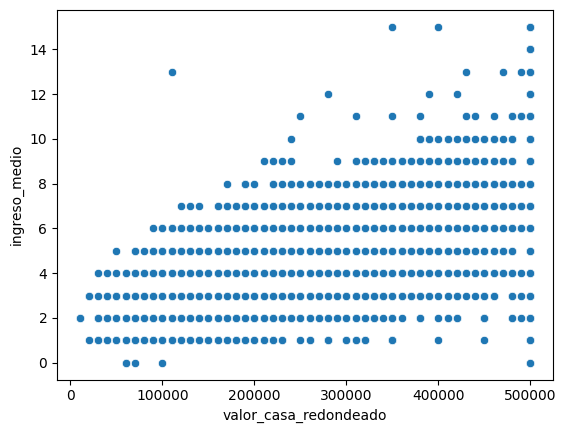

In [68]:
sb.scatterplot(x=datos_na['valor_casa_redondeado'], y=datos_na['ingreso_medio'])

In [78]:
datos_na['room_ratio'] = datos_na['total_bedrooms'] /  datos_na['total_rooms']

<Axes: >

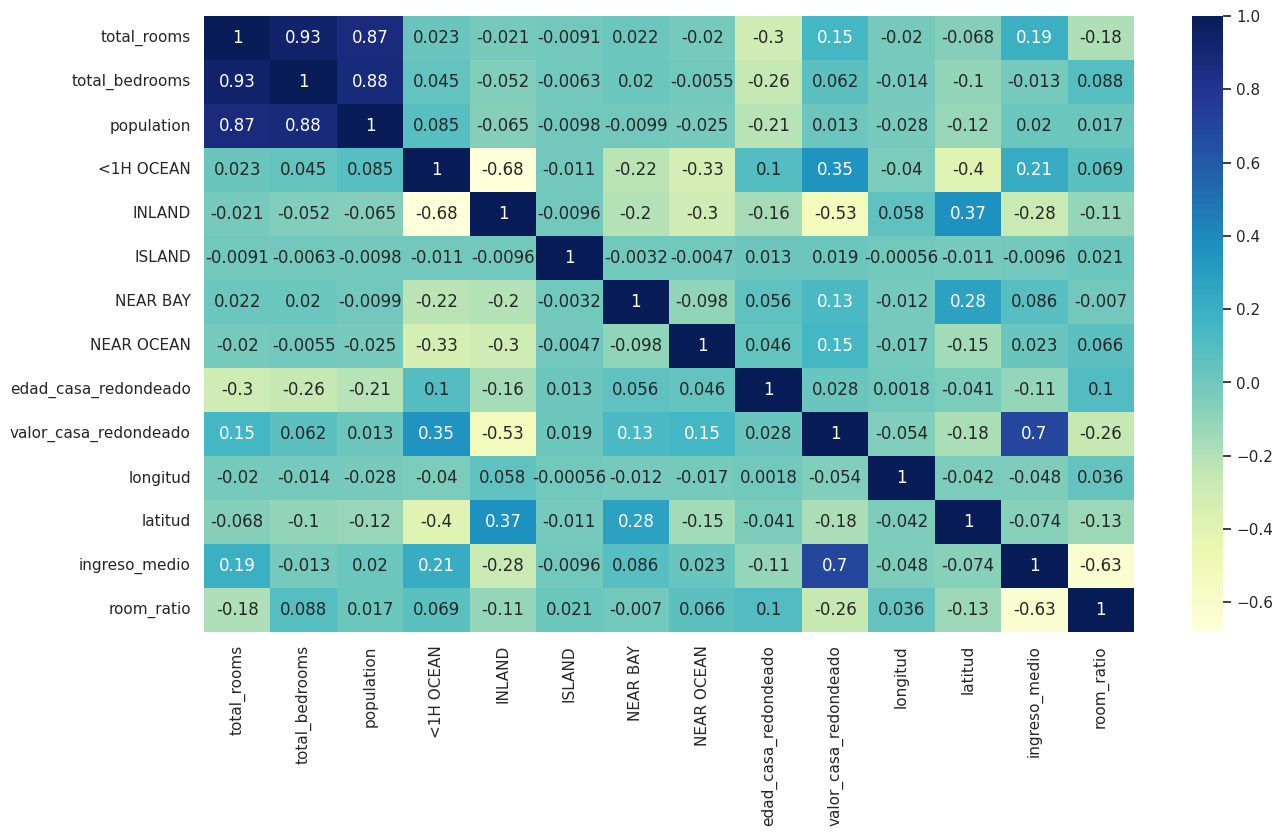

In [70]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [71]:
X = datos_na.drop(['valor_casa_redondeado'], axis=1)
y = datos_na['valor_casa_redondeado']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.2)

In [73]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [74]:
predicciones = modelo.predict(X_test)

In [75]:
comparativa = { 'predicciones': predicciones, 'Valor original': y_test }

pd.DataFrame(comparativa)

,predicciones,Valor original
13702,95458.481278,80000.0
9839,246927.709905,230000.0
11598,302415.921515,360000.0
6096,228699.850453,170000.0
17459,141938.352577,220000.0
...,...,...
10418,238634.284760,500000.0
14144,242828.300727,130000.0
1089,93897.101414,60000.0
12879,123952.463000,110000.0


In [76]:
print(modelo.score(X_train, y_train))

print(modelo.score(X_test, y_test))

0.6439935285323386
0.6357851012025763


In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error( y_test, predicciones )

mse = np.sqrt(mse)

mse

65328.68937841083

In [42]:
# Escalamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.fit_transform(X_test)

pd.DataFrame(X_train_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.279199,1.195750,0.274897,1.149916,-0.787250,-0.013692,-0.257592,-0.376850,-0.141630,-0.046476,-0.925109,-1.040054,-0.352698
1,-1.018508,-1.091400,-1.079062,-0.869629,1.270244,-0.013692,-0.257592,-0.376850,1.074242,-0.046476,1.080954,-0.519051,-0.544572
2,0.421289,0.035721,-0.060376,-0.869629,-0.787250,-0.013692,3.882111,-0.376850,1.074242,-0.046476,1.080954,1.043960,-0.999333
3,0.034150,-0.038324,1.414676,-0.869629,-0.787250,-0.013692,-0.257592,2.653572,1.074242,-0.046476,-0.925109,-0.519051,-0.353842
4,-0.633332,-0.712951,-0.262448,1.149916,-0.787250,-0.013692,-0.257592,-0.376850,1.074242,-0.046476,-0.925109,0.001953,-0.433975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10666,-0.661209,-0.492874,-0.266989,1.149916,-0.787250,-0.013692,-0.257592,-0.376850,1.074242,-0.046476,-0.925109,-1.561058,1.110163
10667,0.157045,-0.100027,0.076609,-0.869629,1.270244,-0.013692,-0.257592,-0.376850,-0.141630,-0.046476,-0.925109,0.522957,-0.810828
10668,0.165290,-0.221378,-0.234446,1.149916,-0.787250,-0.013692,-0.257592,-0.376850,1.074242,-0.046476,-0.925109,1.564964,-1.128800
10669,0.809606,0.033664,0.394476,1.149916,-0.787250,-0.013692,-0.257592,-0.376850,-0.141630,-0.046476,-0.925109,2.085968,-1.525889


In [43]:
X_train_esc, X_test_esc, y_train, y_test  = train_test_split(X, y, test_size=.2)

In [44]:
modelo.fit(X_train_esc, y_train)

LinearRegression()

In [45]:
predicciones = modelo.predict(X_test_esc)

In [46]:
comparativa = { 'predicciones': predicciones, 'Valor original': y_test }

pd.DataFrame(comparativa)

,predicciones,Valor original
12435,49331.739350,60000.0
19309,251989.570240,290000.0
9521,130770.248499,80000.0
14498,279113.600081,190000.0
7788,250961.090188,220000.0
...,...,...
12867,170238.969707,100000.0
5957,204314.069015,190000.0
19717,80491.958867,60000.0
13078,112025.308765,120000.0


In [47]:
print(modelo.score(X_train_esc, y_train))

print(modelo.score(X_test_esc, y_test))

0.651319522130785
0.607313466256006
